In [1]:
import pickle

import matplotlib.pyplot as plt
import torch

In [2]:
with open("instance.pickle", "rb") as file:
    instance = pickle.load(file)

In [3]:
(k, m, n, stdev) = (instance.k, instance.m, instance.n, instance.stdev)
(A, x0, noise, y) = (instance.A, instance.x0, instance.noise, instance.y)

In [4]:
tau = 1 / stdev**2  # noise is known
xi = 1e4

In [5]:
mu = torch.zeros(n)
Gamma = torch.eye(n)

In [6]:
m2 = mu.square() + Gamma.diag()
w = (xi / (m2 + 1e-9)).sqrt()

In [7]:
Gamma = torch.linalg.inv(w.diag() + tau * A.t() @ A)

In [8]:
mu = tau * Gamma @ A.t() @ y

In [9]:
w_init = w.clone()
Gamma_init = Gamma.clone()
mu_init = mu.clone()

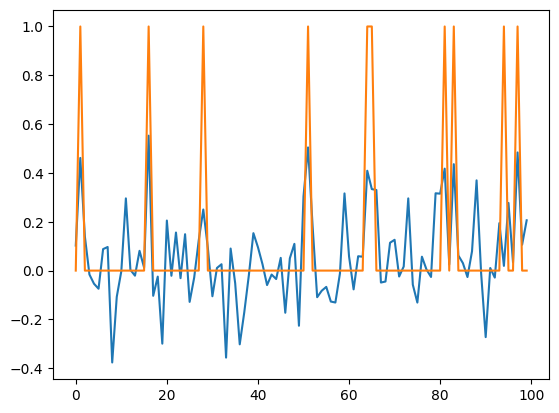

In [10]:
plt.plot(mu);
plt.plot(x0);

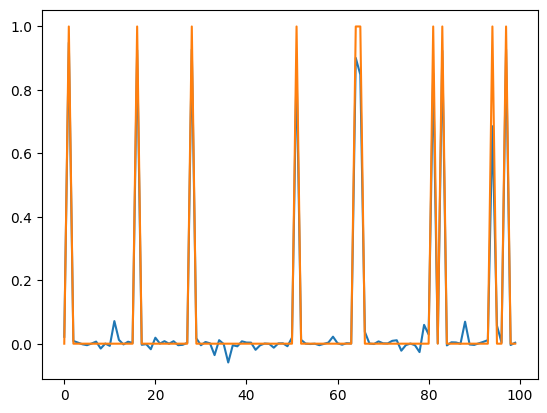

In [11]:
for _ in range(100):
    m2 = mu.square() + Gamma.diag()
    w = (xi / (m2 + 1e-9)).sqrt()
    Gamma = torch.linalg.inv(w.diag() + tau * A.t() @ A)
    mu = tau * Gamma @ A.t() @ y

plt.plot(mu);
plt.plot(x0);

### Takeaways

1. The $w$-update equation that comes from MAP is pretty useless. It's sensitive to float/double precision
   and no amount of tinkering with $\xi$ resulted in a convergent algorithm.
2. The $w$-update equation from EM (maximizing w.r.t $x$) is much better. It's less sensitive to precision
   and converges.
3. As we want a distribution over $x$ *and* the EM-type $w$-update, we need to use VRLS.
4. There does appear to be a sweet spot for $\xi$, which *suggests* we should try extended VRLS.